# Import Necessary Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout 
from tensorflow.keras.optimizers  import SGD,Adamax,RMSprop 
from sklearn.metrics import classification_report,confusion_matrix  
import matplotlib.image as mpimg


2025-04-16 17:47:42.363295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744825662.663646      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744825662.741378      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Prepare Data From and paths

In [3]:
folddir="/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"
classes=os.listdir(folddir)
images_paths=[]
label=[]
for i in classes:
    folderclasspath=os.path.join(folddir,i)
    imagespaths=os.listdir(folderclasspath)
    for j in imagespaths:
        image_path=os.path.join(folderclasspath,j)
        images_paths.append(image_path)
        label.append(i)
df=pd.DataFrame(data={"Image Path":images_paths,"Label":label})
df


,Image Path,Label
0,/kaggle/input/breast-ultrasound-images-dataset...,benign
1,/kaggle/input/breast-ultrasound-images-dataset...,benign
2,/kaggle/input/breast-ultrasound-images-dataset...,benign
3,/kaggle/input/breast-ultrasound-images-dataset...,benign
4,/kaggle/input/breast-ultrasound-images-dataset...,benign
...,...,...
1573,/kaggle/input/breast-ultrasound-images-dataset...,malignant
1574,/kaggle/input/breast-ultrasound-images-dataset...,malignant
1575,/kaggle/input/breast-ultrasound-images-dataset...,malignant
1576,/kaggle/input/breast-ultrasound-images-dataset...,malignant


In [3]:
df.Label.value_counts()

Label
benign       891
malignant    421
normal       266
Name: count, dtype: int64

# Split Data to Train, Test

In [4]:
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42,stratify=df["Label"])
train_df.Label.value_counts()

Label
benign       712
malignant    337
normal       213
Name: count, dtype: int64

In [6]:
test_df.Label.value_counts()

Label
benign       179
malignant     84
normal        53
Name: count, dtype: int64

# Data Preprocessing and Agumentation 

In [5]:
tr_gen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
ts_gen=ImageDataGenerator(rescale=1./255)
train_gen=tr_gen.flow_from_dataframe( train_df, x_col= 'Image Path', y_col= 'Label', target_size= (128, 128), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= 32)
test_gen=ts_gen.flow_from_dataframe( test_df, x_col= 'Image Path', y_col= 'Label', target_size= (128, 128), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= 16)

        

Found 1262 validated image filenames belonging to 3 classes.
Found 316 validated image filenames belonging to 3 classes.


# Modelling 

# CNN Model With RMSprop Optimizer

In [11]:
model1=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=( 128,128,3)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    Conv2D(128,(3,3),activation="relu"),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation="relu"),
    Conv2D(256,(3,3),activation="relu"),
    Conv2D(256,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(512,(3,3),activation="relu"),
    Conv2D(512,(3,3),activation="relu"),
    Conv2D(512,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    BatchNormalization(),
    Dense(64,activation="relu"),
    Dense(3,activation="softmax") 
    
])
model1.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 55, 55, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 23, 23, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 21, 21, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,939,971 (30.29 MB)

 Trainable params: 7,935,875 (30.27 MB)

 Non-trainable params: 4,096 (16.00 KB)

# Training Model

In [12]:
model1.fit(train_gen,epochs=50,validation_data=test_gen)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - accuracy: 0.4360 - loss: 1.8917 - val_accuracy: 0.4304 - val_loss: 2.0302
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.5263 - loss: 1.2519 - val_accuracy: 0.6203 - val_loss: 11.2211
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 296ms/step - accuracy: 0.5597 - loss: 1.0080 - val_accuracy: 0.5222 - val_loss: 1.2046
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 293ms/step - accuracy: 0.5464 - loss: 0.9848 - val_accuracy: 0.6266 - val_loss: 28.5852
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.5553 - loss: 0.9781 - val_accuracy: 0.4873 - val_loss: 1.3757
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.6054 - loss: 0.8982 - val_accuracy: 0.4684 - val_loss: 2.7533
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 294ms/step - accuracy: 0.5900 - loss: 0.8693 - val_accuracy: 0.6139 - val_loss: 0.7504
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.6341 - loss: 0.8242 - val_ac

# Evaluate Model 

In [13]:
train_score = model1.evaluate(train_gen, verbose= 1)
test_score = model1.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.5311 - loss: 12.0470
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6156 - loss: 3.4590
Train Loss:  11.18851375579834
Train Accuracy:  0.5332804918289185
--------------------
Test Loss:  2.6273865699768066
Test Accuracy:  0.5917721390724182


# Model with SGD Optimizers

In [14]:
model2=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=( 128, 128,3)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation="relu"),
    Conv2D(256,(3,3),activation="relu"),
    Conv2D(256,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(512,(3,3),activation="relu"),
    Conv2D(512,(3,3),activation="relu"),
    Conv2D(512,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    BatchNormalization(),
    Dense(64,activation="relu"),
    Dense(3,activation="softmax") 
    
])
model2.compile(loss='categorical_crossentropy',optimizer=SGD(), metrics=['accuracy'])
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 59, 59, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 57, 57, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 55, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 23, 23, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 51200)               │         204,800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       3,276,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,950,211 (41.77 MB)

 Trainable params: 10,847,811 (41.38 MB)

 Non-trainable params: 102,400 (400.00 KB)

# Train Model

In [15]:
model2.fit(train_gen,epochs=50,validation_data=test_gen)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4386 - loss: 1.0420 - val_accuracy: 0.5665 - val_loss: 1.0502
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.5642 - loss: 0.9297 - val_accuracy: 0.5665 - val_loss: 1.0250
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.5707 - loss: 0.9039 - val_accuracy: 0.5665 - val_loss: 1.0155
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.5841 - loss: 0.8765 - val_accuracy: 0.6234 - val_loss: 0.9998
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.6039 - loss: 0.8558 - val_accuracy: 0.5665 - val_loss: 0.9905
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 335ms/step - accuracy: 0.6165 - loss: 0.7986 - val_accuracy: 0.6013 - val_loss: 0.9512
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 342ms/step - accuracy: 0.6382 - loss: 0.7959 - val_accuracy: 0.5854 - val_loss: 0.9393
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step - accuracy: 0.6280 - loss: 0.8120 - val_accurac

# Evaluate Model 

In [16]:
train_score = model2.evaluate(train_gen, verbose= 1)
test_score = model2.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 449ms/step - accuracy: 0.8026 - loss: 0.4888
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.7690 - loss: 0.5339
Train Loss:  0.5347597002983093
Train Accuracy:  0.7868462800979614
--------------------
Test Loss:  0.5099308490753174
Test Accuracy:  0.7848101258277893


# Model With Adamax

In [21]:
model3=Sequential([
    Conv2D(512,(3,3),activation="relu",input_shape=( 128,128,3)),
    Conv2D(512,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(512,(3,3),activation="relu"),
    Conv2D(512,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(1024,(3,3),activation="relu"),
    Conv2D(1024,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    MaxPooling2D((2,2)),
    Conv2D(1024,(3,3),activation="relu"),
    Conv2D(1024,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    BatchNormalization(),
    Dense(64,activation="relu"),
    Dense(64,activation="relu"),
    Dense(3,activation="softmax") 
    
])
model3.compile(loss='categorical_crossentropy',optimizer=Adamax(), metrics=['accuracy'])
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)                   │ (None, 126, 126, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 124, 124, 512)       │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 62, 62, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 60, 60, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 58, 58, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 29, 29, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 27, 27, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 25, 25, 1024)        │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 12, 12, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 6, 6, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 4, 4, 1024)          │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 2, 2, 1024)          │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 1, 1, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,202,051 (153.36 MB)

 Trainable params: 40,200,003 (153.35 MB)

 Non-trainable params: 2,048 (8.00 KB)

# Train Model

In [23]:
model3.fit(train_gen,epochs=100,validation_data=test_gen)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.8182 - loss: 0.4703 - val_accuracy: 0.8449 - val_loss: 0.4107
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8089 - loss: 0.4849 - val_accuracy: 0.7690 - val_loss: 0.5333
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7796 - loss: 0.5005 - val_accuracy: 0.8449 - val_loss: 0.4445
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7994 - loss: 0.4768 - val_accuracy: 0.7278 - val_loss: 0.5541
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7831 - loss: 0.4868 - val_accuracy: 0.8101 - val_loss: 0.4507
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8048 - loss: 0.4722 - val_accuracy: 0.8513 - val_loss: 0.3917
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7931 - loss: 0.4776 - val_accuracy: 0.8165 - val_loss: 0.4558
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7985 - loss: 0.4704 - val_accuracy: 0.7816 - v

# train more

In [24]:
model3.fit(train_gen,epochs=30,validation_data=test_gen)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.8697 - loss: 0.3163 - val_accuracy: 0.8703 - val_loss: 0.3411
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8620 - loss: 0.3334 - val_accuracy: 0.8544 - val_loss: 0.4841
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8818 - loss: 0.3109 - val_accuracy: 0.8481 - val_loss: 0.3784
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8672 - loss: 0.3109 - val_accuracy: 0.8576 - val_loss: 0.3529
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8899 - loss: 0.2662 - val_accuracy: 0.8829 - val_loss: 0.3258
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8515 - loss: 0.3417 - val_accuracy: 0.8734 - val_loss: 0.3220
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8964 - loss: 0.2905 - val_accuracy: 0.8861 - val_loss: 0.3091
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8757 - loss: 0.2972 - val_accuracy: 0.8608 - val_loss:

In [27]:
model3.save("model3.h5")

# more

In [26]:
model3.fit(train_gen,epochs=60,validation_data=test_gen)


Epoch 1/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8888 - loss: 0.2728 - val_accuracy: 0.8703 - val_loss: 0.3283
Epoch 2/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8800 - loss: 0.3189 - val_accuracy: 0.8797 - val_loss: 0.3340
Epoch 3/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9019 - loss: 0.2528 - val_accuracy: 0.8829 - val_loss: 0.3044
Epoch 4/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8799 - loss: 0.2829 - val_accuracy: 0.8892 - val_loss: 0.2997
Epoch 5/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8881 - loss: 0.2503 - val_accuracy: 0.8608 - val_loss: 0.3221
Epoch 6/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9054 - loss: 0.2643 - val_accuracy: 0.8829 - val_loss: 0.3798
Epoch 7/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8945 - loss: 0.2534 - val_accuracy: 0.8354 - val_loss: 0.3942
Epoch 8/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8867 - loss: 0.2696 - val_accuracy: 0.8829 - val_loss:

# Evaluate Model

In [28]:
train_score = model3.evaluate(train_gen, verbose= 1)
test_score = model3.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 564ms/step - accuracy: 0.9272 - loss: 0.1976
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.8771 - loss: 0.2972
Train Loss:  0.20034007728099823
Train Accuracy:  0.9255150556564331
--------------------
Test Loss:  0.34887656569480896
Test Accuracy:  0.8702531456947327


# Modeling With Pretrained Modelling 

# EfficientNetB0

# Prepare Data


In [5]:
tr_gen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
ts_gen=ImageDataGenerator(rescale=1./255)
train_gen=tr_gen.flow_from_dataframe( train_df, x_col= 'Image Path', y_col= 'Label', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= 32)
test_gen=ts_gen.flow_from_dataframe( test_df, x_col= 'Image Path', y_col= 'Label', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= 16)

Found 1262 validated image filenames belonging to 3 classes.
Found 316 validated image filenames belonging to 3 classes.


# modelling

In [8]:
from tensorflow.keras.applications import EfficientNetB0

In [9]:
base_model=EfficientNetB0(
    weights='imagenet',      
    include_top=False ,
    input_shape=(224, 224, 3)
)

I0000 00:00:1744797439.024238      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744797439.024901      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model4 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  
])
model4.compile(loss='categorical_crossentropy',optimizer=Adamax(), metrics=['accuracy'])
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,094,758 (46.14 MB)

 Trainable params: 12,052,735 (45.98 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [12]:
model4.fit(train_gen,epochs=30,validation_data=test_gen)


Epoch 1/30


I0000 00:00:1744797643.865666      99 service.cc:148] XLA service 0x7e70880042a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744797643.866288      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744797643.866309      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744797647.779700      99 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1744797657.703803      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744797657.846847      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744797658.297480      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. Th

33/40 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - accuracy: 0.5928 - loss: 1.4911

E0000 00:00:1744797711.158876     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744797711.296430     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


40/40 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6109 - loss: 1.3837 - val_accuracy: 0.1677 - val_loss: 3.4960
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 469ms/step - accuracy: 0.7995 - loss: 0.5106 - val_accuracy: 0.1677 - val_loss: 3.5154
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 0.8288 - loss: 0.4052 - val_accuracy: 0.1677 - val_loss: 2.4701
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - accuracy: 0.8475 - loss: 0.3437 - val_accuracy: 0.1677 - val_loss: 2.7184
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 460ms/step - accuracy: 0.8807 - loss: 0.3308 - val_accuracy: 0.2405 - val_loss: 2.3614
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.8845 - loss: 0.3151 - val_accuracy: 0.4177 - val_loss: 1.4152
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 445ms/step - accuracy: 0.8945 - loss: 0.2628 - val_accuracy: 0.5506 - val_loss: 0.9829
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 450ms/step - accuracy: 0.9103 - loss: 0.2261 - val_accuracy: 0.5791 

# train more

In [13]:
model4.fit(train_gen,epochs=20,validation_data=test_gen)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - accuracy: 0.9662 - loss: 0.1019 - val_accuracy: 0.9304 - val_loss: 0.2377
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 446ms/step - accuracy: 0.9551 - loss: 0.1029 - val_accuracy: 0.8766 - val_loss: 0.4164
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 457ms/step - accuracy: 0.9694 - loss: 0.0977 - val_accuracy: 0.8797 - val_loss: 0.5783
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.9675 - loss: 0.0952 - val_accuracy: 0.8703 - val_loss: 0.4618
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.9615 - loss: 0.1125 - val_accuracy: 0.9272 - val_loss: 0.2655
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 441ms/step - accuracy: 0.9766 - loss: 0.0797 - val_accuracy: 0.9146 - val_loss: 0.3426
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.9639 - loss: 0.1117 - val_accuracy: 0.9241 - val_loss: 0.2382
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.9540 - loss: 0.1479 - val_accu

# more

In [15]:
model4.fit(train_gen,epochs=30,validation_data=test_gen)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.9721 - loss: 0.0948 - val_accuracy: 0.9430 - val_loss: 0.2087
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 0.9709 - loss: 0.0913 - val_accuracy: 0.9241 - val_loss: 0.3033
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 444ms/step - accuracy: 0.9806 - loss: 0.0583 - val_accuracy: 0.9272 - val_loss: 0.3896
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.9632 - loss: 0.1193 - val_accuracy: 0.9430 - val_loss: 0.2681
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.9769 - loss: 0.0688 - val_accuracy: 0.9177 - val_loss: 0.3730
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 441ms/step - accuracy: 0.9727 - loss: 0.0879 - val_accuracy: 0.9272 - val_loss: 0.3015
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.9762 - loss: 0.0686 - val_accuracy: 0.9177 - val_loss: 0.3900
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 0.9846 - loss: 0.0564 - val_accu

# Accuracy not changed befor increasing epochs 

# Evalute Model

In [16]:
train_score = model4.evaluate(train_gen, verbose= 1)
test_score = model4.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step - accuracy: 0.9793 - loss: 0.0506
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9358 - loss: 0.3212
Train Loss:  0.05596799775958061
Train Accuracy:  0.9762282371520996
--------------------
Test Loss:  0.340917706489563
Test Accuracy:  0.9240506291389465


# ResNet50

In [17]:
from tensorflow.keras.applications import ResNet50


In [18]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
model5 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  
])
model5.compile(loss='categorical_crossentropy',optimizer=Adamax(), metrics=['accuracy'])
model5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,449,795 (139.04 MB)

 Trainable params: 36,396,675 (138.84 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Train 

In [20]:
model5.fit(train_gen,epochs=80,validation_data=test_gen)


Epoch 1/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.4889 - loss: 4.4254 - val_accuracy: 0.2658 - val_loss: 1.3734
Epoch 2/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 477ms/step - accuracy: 0.7128 - loss: 0.7864 - val_accuracy: 0.5665 - val_loss: 1.0897
Epoch 3/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 470ms/step - accuracy: 0.7478 - loss: 0.6604 - val_accuracy: 0.1677 - val_loss: 1.2652
Epoch 4/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 461ms/step - accuracy: 0.7586 - loss: 0.5518 - val_accuracy: 0.1677 - val_loss: 1.9331
Epoch 5/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 487ms/step - accuracy: 0.7638 - loss: 0.5685 - val_accuracy: 0.1677 - val_loss: 2.1317
Epoch 6/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 475ms/step - accuracy: 0.7782 - loss: 0.5160 - val_accuracy: 0.1677 - val_loss: 2.1678
Epoch 7/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 479ms/step - accuracy: 0.8045 - loss: 0.4452 - val_accuracy: 0.1677 - val_loss: 2.2496
Epoch 8/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 474ms/step - accuracy: 0.8041 - loss: 0.4391 - val_accura

# more epochs 

In [22]:
model5.fit(train_gen,epochs=20,validation_data=test_gen)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - accuracy: 0.9659 - loss: 0.1025 - val_accuracy: 0.9082 - val_loss: 0.3987
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 471ms/step - accuracy: 0.9672 - loss: 0.0974 - val_accuracy: 0.8987 - val_loss: 0.3854
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 485ms/step - accuracy: 0.9656 - loss: 0.1089 - val_accuracy: 0.9430 - val_loss: 0.1838
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - accuracy: 0.9688 - loss: 0.0848 - val_accuracy: 0.8987 - val_loss: 0.5495
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 461ms/step - accuracy: 0.9593 - loss: 0.1045 - val_accuracy: 0.9051 - val_loss: 0.4464
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 477ms/step - accuracy: 0.9456 - loss: 0.1470 - val_accuracy: 0.9019 - val_loss: 0.3988
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 478ms/step - accuracy: 0.9709 - loss: 0.1006 - val_accuracy: 0.9399 - val_loss: 0.2744
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 472ms/step - accuracy: 0.9783 - loss: 0.0755 - val_accu

# more

In [24]:
model5.fit(train_gen,epochs=10,validation_data=test_gen)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 486ms/step - accuracy: 0.9511 - loss: 0.1469 - val_accuracy: 0.8734 - val_loss: 0.7306
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 491ms/step - accuracy: 0.9709 - loss: 0.0828 - val_accuracy: 0.8956 - val_loss: 0.4392
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 488ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.8861 - val_loss: 0.7028
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - accuracy: 0.9706 - loss: 0.0752 - val_accuracy: 0.9241 - val_loss: 0.5159
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 468ms/step - accuracy: 0.9660 - loss: 0.0959 - val_accuracy: 0.9209 - val_loss: 0.5704
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 492ms/step - accuracy: 0.9730 - loss: 0.1108 - val_accuracy: 0.9209 - val_loss: 0.4307
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - accuracy: 0.9767 - loss: 0.0726 - val_accuracy: 0.9367 - val_loss: 0.2930
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 484ms/step - accuracy: 0.9738 - loss: 0.0935 - val_accu

# Accuracy increasing (more epochs) 

In [26]:
model5.fit(train_gen,epochs=5,validation_data=test_gen)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 483ms/step - accuracy: 0.9734 - loss: 0.0640 - val_accuracy: 0.9272 - val_loss: 0.2891
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 479ms/step - accuracy: 0.9768 - loss: 0.0802 - val_accuracy: 0.9304 - val_loss: 0.2479
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 486ms/step - accuracy: 0.9573 - loss: 0.1265 - val_accuracy: 0.9399 - val_loss: 0.2152
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 471ms/step - accuracy: 0.9725 - loss: 0.0778 - val_accuracy: 0.8892 - val_loss: 0.5820
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 479ms/step - accuracy: 0.9599 - loss: 0.1114 - val_accuracy: 0.9019 - val_loss: 0.5919


# Evaluate 

In [27]:
train_score = model5.evaluate(train_gen, verbose= 1)
test_score = model5.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 450ms/step - accuracy: 0.9536 - loss: 0.1530
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9116 - loss: 0.4119
Train Loss:  0.1273081749677658
Train Accuracy:  0.9595879316329956
--------------------
Test Loss:  0.5919198393821716
Test Accuracy:  0.9018987417221069


# VGG19

In [6]:
from tensorflow.keras.applications import VGG19

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

I0000 00:00:1744825728.186003      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744825728.186676      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
model6 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  
])
model6.compile(loss='categorical_crossentropy',optimizer=Adamax(), metrics=['accuracy'])
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,252,675 (88.70 MB)

 Trainable params: 23,252,675 (88.70 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [8]:
model6.fit(train_gen,epochs=80,validation_data=test_gen)


Epoch 1/80


I0000 00:00:1744825754.915101      94 service.cc:148] XLA service 0x7a79f4002220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744825754.916227      94 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744825754.916246      94 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744825755.545666      94 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1744825787.035392      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5451 - loss: 3.4814 - val_accuracy: 0.5665 - val_loss: 1.0131
Epoch 2/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 617ms/step - accuracy: 0.5615 - loss: 1.0167 - val_accuracy: 0.5665 - val_loss: 0.9602
Epoch 3/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 646ms/step - accuracy: 0.5663 - loss: 0.9515 - val_accuracy: 0.5665 - val_loss: 0.8343
Epoch 4/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 676ms/step - accuracy: 0.6420 - loss: 0.8105 - val_accuracy: 0.6519 - val_loss: 0.8103
Epoch 5/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 676ms/step - accuracy: 0.6405 - loss: 0.8066 - val_accuracy: 0.6582 - val_loss: 0.7051
Epoch 6/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 671ms/step - accuracy: 0.6670 - loss: 0.7107 - val_accuracy: 0.6424 - val_loss: 0.7316
Epoch 7/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 676ms/step - accuracy: 0.6527 - loss: 0.7456 - val_accuracy: 0.6519 - val_loss: 0.6916
Epoch 8/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 678ms/step - accuracy: 0.6696 - loss: 0.7202 - val_accuracy: 0.6835 

In [9]:
model6.fit(train_gen,epochs=80,validation_data=test_gen)


Epoch 1/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 604ms/step - accuracy: 0.8529 - loss: 0.3576 - val_accuracy: 0.8544 - val_loss: 0.3731
Epoch 2/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 625ms/step - accuracy: 0.8759 - loss: 0.3308 - val_accuracy: 0.9146 - val_loss: 0.2644
Epoch 3/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 661ms/step - accuracy: 0.8672 - loss: 0.3123 - val_accuracy: 0.8671 - val_loss: 0.3177
Epoch 4/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 689ms/step - accuracy: 0.8941 - loss: 0.2930 - val_accuracy: 0.8924 - val_loss: 0.2978
Epoch 5/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 678ms/step - accuracy: 0.8931 - loss: 0.2800 - val_accuracy: 0.8671 - val_loss: 0.2810
Epoch 6/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 677ms/step - accuracy: 0.8776 - loss: 0.3035 - val_accuracy: 0.8829 - val_loss: 0.4001
Epoch 7/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 696ms/step - accuracy: 0.8955 - loss: 0.2998 - val_accuracy: 0.8861 - val_loss: 0.3324
Epoch 8/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 680ms/step - accuracy: 0.8821 - loss: 0.2955 - val_accu

In [11]:
model6.fit(train_gen,epochs=80,validation_data=test_gen)


Epoch 1/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 729ms/step - accuracy: 0.9289 - loss: 0.1824 - val_accuracy: 0.8956 - val_loss: 0.4093
Epoch 2/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 695ms/step - accuracy: 0.9489 - loss: 0.1214 - val_accuracy: 0.8956 - val_loss: 0.4196
Epoch 3/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 728ms/step - accuracy: 0.9328 - loss: 0.1767 - val_accuracy: 0.9082 - val_loss: 0.3060
Epoch 4/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 705ms/step - accuracy: 0.9239 - loss: 0.2153 - val_accuracy: 0.8797 - val_loss: 0.3361
Epoch 5/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 707ms/step - accuracy: 0.9333 - loss: 0.1696 - val_accuracy: 0.9209 - val_loss: 0.3307
Epoch 6/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 731ms/step - accuracy: 0.9309 - loss: 0.1874 - val_accuracy: 0.8861 - val_loss: 0.4525
Epoch 7/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 753ms/step - accuracy: 0.9296 - loss: 0.2051 - val_accuracy: 0.8924 - val_loss: 0.3254
Epoch 8/80
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 713ms/step - accuracy: 0.9364 - loss: 0.1674 - val_accu

# Evaluate 

In [12]:
train_score = model6.evaluate(train_gen, verbose= 1)
test_score = model6.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 447ms/step - accuracy: 0.9569 - loss: 0.1390
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8944 - loss: 0.4454
Train Loss:  0.12852033972740173
Train Accuracy:  0.9572107791900635
--------------------
Test Loss:  0.4183734357357025
Test Accuracy:  0.8955696225166321


# MobileNetV2

In [13]:
from tensorflow.keras.applications import MobileNetV2


In [14]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model7 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  
])
model7.compile(loss='categorical_crossentropy',optimizer=Adamax(), metrics=['accuracy'])
model7.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,303,171 (39.30 MB)

 Trainable params: 10,269,059 (39.17 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [16]:
model7.fit(train_gen,epochs=100,validation_data=test_gen)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6307 - loss: 2.5965 - val_accuracy: 0.3956 - val_loss: 16.9614
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.7779 - loss: 0.5378 - val_accuracy: 0.2753 - val_loss: 18.2745
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.8338 - loss: 0.3947 - val_accuracy: 0.2658 - val_loss: 20.7845
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 431ms/step - accuracy: 0.8408 - loss: 0.4067 - val_accuracy: 0.2690 - val_loss: 13.8238
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.8677 - loss: 0.3306 - val_accuracy: 0.3481 - val_loss: 10.2389
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.8513 - loss: 0.3600 - val_accuracy: 0.2848 - val_loss: 9.3363
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.8903 - loss: 0.2988 - val_accuracy: 0.2753 - val_loss: 8.2703
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.8742 - loss: 0.2945 

In [17]:
model7.fit(train_gen,epochs=20,validation_data=test_gen)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.9747 - loss: 0.0743 - val_accuracy: 0.9177 - val_loss: 0.4428
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.9775 - loss: 0.0714 - val_accuracy: 0.8829 - val_loss: 0.6495
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.9816 - loss: 0.0493 - val_accuracy: 0.8892 - val_loss: 1.0666
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.9739 - loss: 0.0861 - val_accuracy: 0.8892 - val_loss: 0.9594
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - accuracy: 0.9795 - loss: 0.0609 - val_accuracy: 0.8987 - val_loss: 0.5984
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.9857 - loss: 0.0395 - val_accuracy: 0.8829 - val_loss: 0.6474
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - accuracy: 0.9709 - loss: 0.0811 - val_accuracy: 0.8956 - val_loss: 0.5890
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.9834 - loss: 0.0657 - val_accu

In [18]:
model7.fit(train_gen,epochs=20,validation_data=test_gen)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.9893 - loss: 0.0363 - val_accuracy: 0.8196 - val_loss: 0.6979
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.9907 - loss: 0.0497 - val_accuracy: 0.9241 - val_loss: 0.4247
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 414ms/step - accuracy: 0.9858 - loss: 0.0501 - val_accuracy: 0.8101 - val_loss: 0.7026
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.9677 - loss: 0.0995 - val_accuracy: 0.9209 - val_loss: 0.6683
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 499ms/step - accuracy: 0.9809 - loss: 0.0530 - val_accuracy: 0.9241 - val_loss: 0.5949
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - accuracy: 0.9877 - loss: 0.0511 - val_accuracy: 0.9082 - val_loss: 0.5567
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 425ms/step - accuracy: 0.9811 - loss: 0.0563 - val_accuracy: 0.9272 - val_loss: 0.5911
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.9702 - loss: 0.0926 - val_accu

In [19]:
model7.fit(train_gen,epochs=30,validation_data=test_gen)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.9828 - loss: 0.0727 - val_accuracy: 0.9114 - val_loss: 0.4815
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 414ms/step - accuracy: 0.9675 - loss: 0.0995 - val_accuracy: 0.9051 - val_loss: 0.6353
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 0.9808 - loss: 0.0641 - val_accuracy: 0.9082 - val_loss: 0.6768
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - accuracy: 0.9843 - loss: 0.0645 - val_accuracy: 0.9241 - val_loss: 0.4978
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.9761 - loss: 0.0760 - val_accuracy: 0.9241 - val_loss: 0.4466
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.9817 - loss: 0.0502 - val_accuracy: 0.9367 - val_loss: 0.4737
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 414ms/step - accuracy: 0.9824 - loss: 0.0655 - val_accuracy: 0.9272 - val_loss: 0.4499
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.9839 - loss: 0.0402 - val_accu

In [21]:
model7.fit(train_gen,epochs=30,validation_data=test_gen)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.8354 - val_loss: 2.4097
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - accuracy: 0.9774 - loss: 0.0452 - val_accuracy: 0.8481 - val_loss: 3.3578
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.9740 - loss: 0.0808 - val_accuracy: 0.9525 - val_loss: 0.4348
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.9779 - loss: 0.0631 - val_accuracy: 0.9494 - val_loss: 0.4435
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.9850 - loss: 0.0438 - val_accuracy: 0.9367 - val_loss: 0.4995
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 433ms/step - accuracy: 0.9816 - loss: 0.0508 - val_accuracy: 0.9399 - val_loss: 0.5089
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 452ms/step - accuracy: 0.9852 - loss: 0.0442 - val_accuracy: 0.9209 - val_loss: 0.4974
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - accuracy: 0.9808 - loss: 0.0556 - val_accu

# Evaluate 

In [22]:
train_score = model7.evaluate(train_gen, verbose= 1)
test_score = model7.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 431ms/step - accuracy: 0.9855 - loss: 0.0512
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9430 - loss: 0.7714
Train Loss:  0.0403127558529377
Train Accuracy:  0.9904912710189819
--------------------
Test Loss:  0.7984845042228699
Test Accuracy:  0.9240506291389465


In [26]:
import itertools


In [24]:
preds = model7.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step


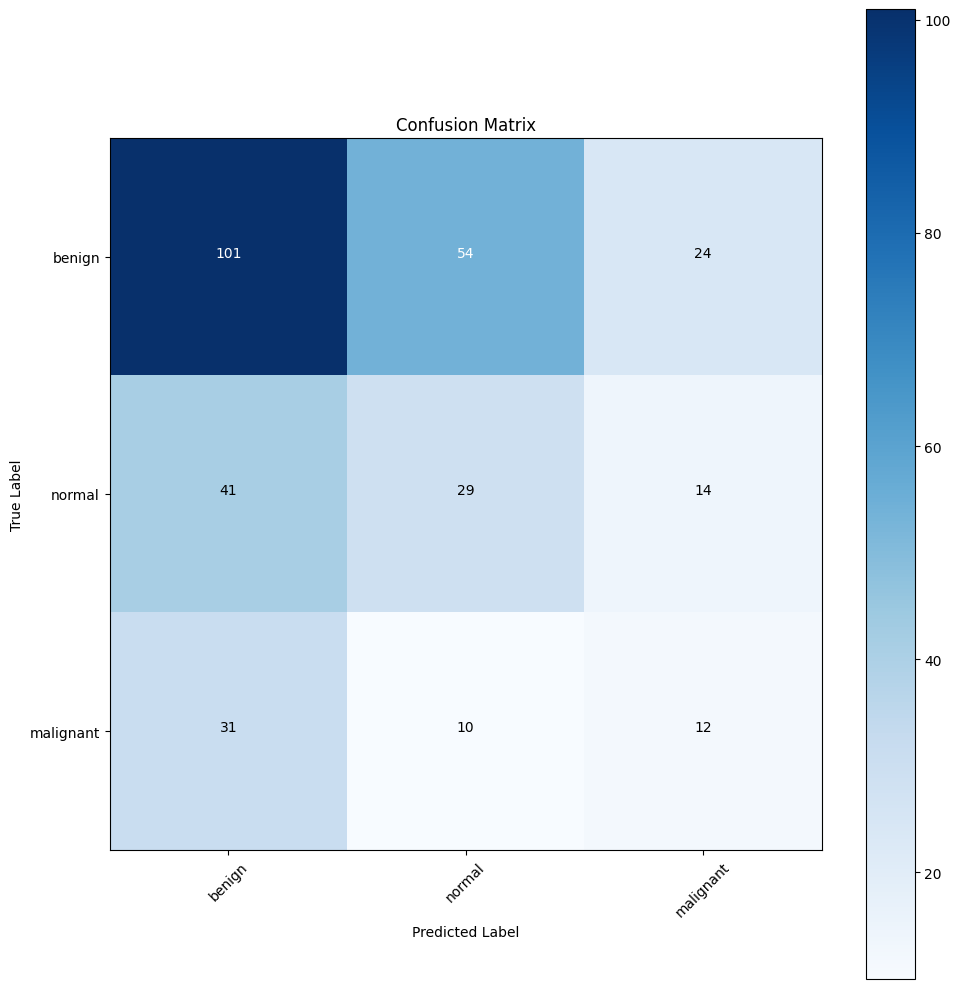

In [27]:
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
